# Construct a dataframe of tweets

#### Walk through all the subfolders and files in the folder dataset and create a dataframe to hold all the 'TweetContent' 

In [1]:
import os
import pandas as pd
import nltk

# Initialize an empty list to store dataframes
dataframes = []

# Define the root directory containing the folders with CSV files
root_directory = './dataset/'

# Walk through the dataset directory and read all CSV files in each folder
for dirname, _, filenames in os.walk(root_directory):
    for filename in filenames:
        # Construct the full file path
        file_path = os.path.join(dirname, filename)
        try:
            # Read the CSV file with a general encoding and handle bad lines
            df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='warn')
            dataframes.append(df)
        except Exception as e:
            pass

tweets_df = pd.concat(dataframes, ignore_index=True)
tweets_df = tweets_df[['TweetContent']]
print(tweets_df.head(15))
print(f'Total number of tweets loaded: {len(tweets_df)}')

                                         TweetContent
0   Major potholes on NY's road to legal marijuana...
1    putting on jeans right after a shower vape juice
2            Everybody still vape or did yâall stop
3   Lucky the kitchen is on the one side of my hou...
4   Umm â¦. If u vape â¦. Literally just throw a...
5   Ima start treatin u vape smokers just like the...
6   holy shit bro tweeted this and is gonna win th...
7   Live in 5 minutes come chat!\n\nâºhttps://t.c...
8              im really tryna stop smoking vapesð­
9   Canât believe that @heidi_koopman and I were...
10  my juul disappeared into thin air and all of a...
11  Nope sorry my ass is flatter than a Vape pen ð...
12  vaping in the church bathroom at thanksgiving ...
13      Nah wedding cake flavored vape is crazyy ð
14  Every time yâall say alc instead of drinks i...
Total number of tweets loaded: 1501619


# What are the top common hashtags in these tweets?

Top 10 Hashtags:
               Hashtag  Count
71               #vape  53649
27             #vaping  42994
99           #vapelife  16246
30                #cbd  13357
29           #cannabis  13234
57               #Vape  12079
0               #vapes  12016
12  #cannabiscommunity  11468
19            #vapefam  11278
28            #edibles  10467


<Figure size 1000x600 with 0 Axes>

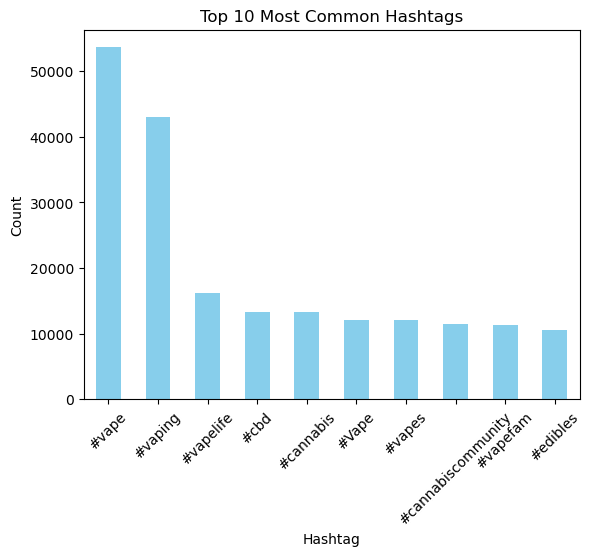

In [4]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Sample dataframe with tweets
tweets = tweets_df['TweetContent'].astype(str).fillna('')  # Convert to string and handle NaN values

# Function to extract hashtags using regex
def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet)

# Extract all hashtags from the dataset
all_hashtags = []
for tweet in tweets:
    all_hashtags.extend(extract_hashtags(tweet))

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert to a DataFrame for easier plotting
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Sort the DataFrame by count (descending order)
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False)

# Display the top 10 most common hashtags
print("Top 10 Hashtags:")
print(hashtag_df.head(10))

# Plot the distribution of the top 10 hashtags
plt.figure(figsize=(10, 6))
hashtag_df.head(10).plot(kind='bar', x='Hashtag', y='Count', legend=False, color='skyblue')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Text Preprocessing
Common preprocessing steps for tweet data include:

- Lowercasing: Convert all text to lowercase.
- Removing URLs: Eliminate any URLs from the text.
- Removing mentions and hashtags: Remove Twitter handles (e.g., @username) and hashtags.
- Removing special characters and punctuation: Clean up the text by removing unwanted characters.
- Tokenization: Split the text into individual words (tokens).
- Removing stop words: Remove common words that may not contribute to sentiment (e.g., "the", "is").


In [17]:
# Download stopwords if you haven't already
# If you need to, run 'pip install nltk' first
nltk.download('stopwords')

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

profanities = {"fucking", "shit", "fuck"}  # Remove profanities
custom_stopwords = stop_words | profanities


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sumitravarma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Updated text preprocessing function
def preprocess_tweet(tweet):
    if isinstance(tweet, str):  # Check if tweet is a string
        # Convert to lowercase
        tweet = tweet.lower()
        # Remove URLs
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
        # Remove mentions and hashtags
        tweet = re.sub(r'@\w+|#\w+', '', tweet)
        # Remove stopwords including profanities
        tweet = ' '.join(word for word in tweet.split() if word not in custom_stopwords)
        # Remove special characters and punctuation
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
        return tweet.strip()
    return ''  # Return empty string for NaN values

# Apply preprocessing to the TweetContent column
tweets_df['CleanedTweet'] = tweets_df['TweetContent'].apply(preprocess_tweet)

# Remove empty or zero-length tweets from the DataFrame
tweets_df = tweets_df[tweets_df['CleanedTweet'].str.len() > 2]


# Get basic statistics of the tweets

In [23]:
# Basic Statistics of rows where 'TweetContent' mentions 'stop smoking' (case insensitive)
stop_smoking_tweets_df = tweets_df[tweets_df['TweetContent'].str.contains(r'\bstop smoking\b', case=False, na=False)]

# Print basic statistics
print(f'Total number of tweets after removing empty ones: {len(tweets_df)}')
print(f'Total number of tweets mentioning the words stop smoking: {len(stop_smoking_tweets_df)}')
print(stop_smoking_tweets_df.head(20))

Total number of tweets after removing empty ones: 1500750
Total number of tweets mentioning the words stop smoking: 4406
                                            TweetContent  \
8                 im really tryna stop smoking vapesð­   
266    Proud to be a week clean from vaping. Now if I...   
345    teenagers should stop smoking and stop vaping ...   
425    Today on a whim Iâve decided to stop smoking...   
638    Smoking causes adverse health consequences. \n...   
685    Trying to stop smoking so now I vape. Best Vap...   
1175   More evidence of the value of vaping as a quit...   
1488   Quit Vaping: Your Four-Step, 28-Day Program to...   
2446   Might be accused of lying for the money but th...   
3036   It was easier for me to stop smoking weed than...   
4873   Man I need a vape so badddddddd ð© I stop sm...   
5112   My vape is almost done &amp; I donât want to...   
6041   I wish mfer stop smoking dem vapes like the ja...   
6338   Fake cough is my defense mechani

# Draw word cloud of the 500 frequent words in the tweets

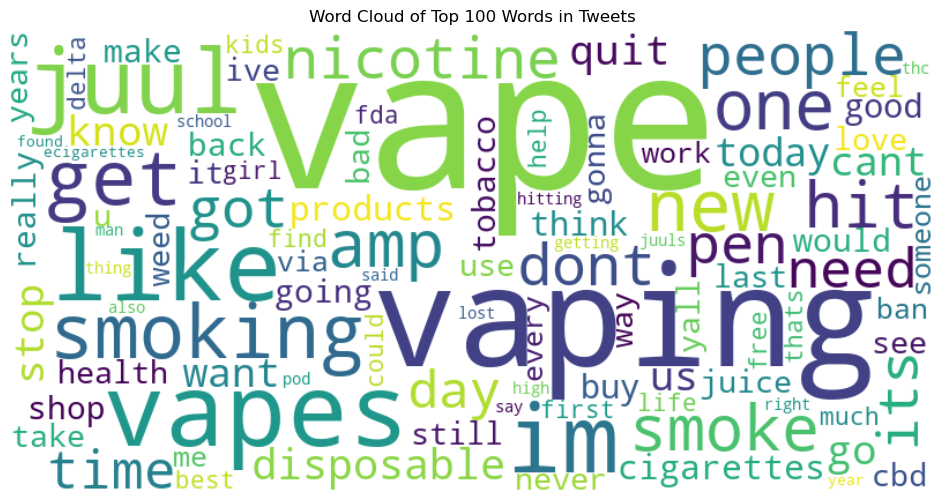

In [25]:
# Tokenize the CleanedTweet column into individual words
words = ' '.join(tweets_df['CleanedTweet']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 100 most common words
top_100_words = dict(word_counts.most_common(100))

# Generate word cloud from the top 500 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 100 Words in Tweets')
plt.show()


In [27]:
!pip install vaderSentiment

# Label all Vape tweets using VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-built sentiment analysis model which is designed for social media text.

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to categorize sentiment based on VADER's compound score
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis to the CleanedTweet column
tweets_df['SentimentScore'] = tweets_df['CleanedTweet'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

# Apply the get_sentiment_label function to create a 'SentimentLabel' column
tweets_df['SentimentLabel'] = tweets_df['SentimentScore'].apply(get_sentiment_label)

# Print out the labeled tweets for verification
print(tweets_df[['CleanedTweet', 'SentimentScore', 'SentimentLabel']].head())

# Summary of sentiment labels
print(tweets_df['SentimentLabel'].value_counts())
del analyzer

                                        CleanedTweet  SentimentScore  \
0  major potholes nys road legal marijuana  new y...          0.1280   
1              putting jeans right shower vape juice          0.0000   
2                     everybody still vape yall stop         -0.2960   
3  lucky kitchen one side house bedroom other rea...          0.4215   
4  umm  u vape  literally throw away ur skin care...          0.8242   

  SentimentLabel  
0       positive  
1        neutral  
2       negative  
3       positive  
4       positive  
SentimentLabel
positive    524694
neutral     516348
negative    459708
Name: count, dtype: int64


# Subsample Vape Tweets from Each class because it's too big


In [33]:
# Sample equal number of tweets from each class
min_class_size=100000
neutral_sample = tweets_df[tweets_df['SentimentLabel'] == 'neutral'].sample(n=min_class_size, random_state=42)
positive_sample = tweets_df[tweets_df['SentimentLabel'] == 'positive'].sample(n=min_class_size, random_state=42)
negative_sample = tweets_df[tweets_df['SentimentLabel'] == 'negative'].sample(n=min_class_size, random_state=42)
# Concatenate the samples to create a balanced dataset
balanced_df = pd.concat([neutral_sample, positive_sample, negative_sample])

# Shuffle the dataframe to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_df.head(20))


                                         TweetContent  \
0   There are more ingredients when vaping than wh...   
1                                 some1 buy me a vape   
2   XBOX rechargeable disposable box vape vapes 50...   
3   Minnesota legal loophole could stir up THC tro...   
4   Nicotine replacement therapy (NRT) will be mad...   
5   omg he's wearing the stripy jumper this episod...   
6   Breaking News: FDA places ban on all Juul vapi...   
7   Yeah. I cropped this picture, like i was t tau...   
8               Cigarettes are just gas-powered vapes   
9           I need to stop vaping, especially at 2am.   
10                       thankful for mint fume vapes   
11  .@Escamilla_AISD would like to thank @MDAnders...   
12  My brother took my vape charger nd goin to tel...   
13  Too many boxers taking Ls and just saying onto...   
14  Why would you play an MMO if you don't want to...   
15  I need to stop smoking vapes and just stick to...   
16  Ruslan walks across the fie

# Create training and test data sets

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(balanced_df['CleanedTweet'], balanced_df['SentimentLabel'], test_size=0.2, random_state=42)

# Convert tweets to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply Logistic Regression (LR) to classify vape tweets
- Pros: Simple, fast, and often provides good results for text classification.
- Cons: May struggle with highly complex or nuanced data.
- How to Apply: Convert your tweets to TF-IDF features and use them to train an LR model.

Accuracy: 0.9091333333333333
              precision    recall  f1-score   support

    negative       0.91      0.87      0.89     19964
     neutral       0.90      0.96      0.93     19953
    positive       0.91      0.90      0.90     20083

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



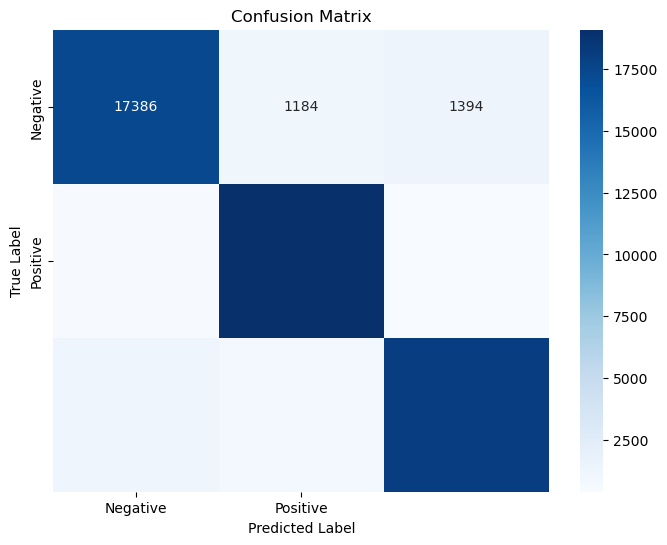

In [38]:

# Train Logistic Regression classifier
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)

# Predict on test set and evaluate
y_pred = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Evaluation of Logistic Regression Model

## Sample Tweet
Let’s take this tweet:

- **"It's great to have stopped smoking finally! Wish I had tried vapes before. "**

## Preprocess the Tweet
- Lowercasing: "it's great to have stopped smoking finally! wish i had tried vapes before."
- Removing punctuation and special characters: "its great to have stopped smoking finally wish i had tried vapes before"
- Removing stopwords: "great have stopped smoking finally wish had tried vapes before"

## Convert to TF-IDF Features and Run Logistic model
After preprocessing, we convert the tweet into numerical features using TF-IDF, which the Logistic Regression model can work with.

In [42]:
# Example of TF-IDF transformation for a single tweet
sample_tweet = ["great have stopped smoking finally wish had tried vapes before"]

# Apply the same TF-IDF vectorizer used in training
sample_tweet_tfidf = vectorizer.transform(sample_tweet)
# Predict the sentiment of the tweet using the trained model
predicted_label = lr.predict(sample_tweet_tfidf)

# Print the predicted sentiment
if predicted_label == 0:
    print("Sentiment: Negative")
elif predicted_label == 1:
    print("Sentiment: Neutral")
else:
    print("Sentiment: Positive")


Sentiment: Positive


# Naive Bayes (NB) Implementation

Naïve Bayes is a strong baseline for text classification due to its simplicity, speed, and effectiveness. While it may not outperform advanced methods like deep learning on complex datasets, its efficiency and interpretability make it an excellent choice for many real-world text classification problems, especially when computational resources are limited or when a quick solution is needed.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#  Evaluation of Naive Bayes Model

## Sample Tweet

- **"It's great to have stopped smoking finally! Wish I had tried vapes before. "**

## Preprocessed Tweet
- Lowercasing: "it's great to have stopped smoking finally! wish i had tried vapes before."
- Removing punctuation and special characters: "its great to have stopped smoking finally wish i had tried vapes before"
- Removing stopwords: "great have stopped smoking finally wish had tried vapes before"

## Convert to TF-IDF Features and Run Naive Bayes model
After preprocessing, we convert the tweet into numerical features using TF-IDF, which the Naive Bayes model can work with.

In [ ]:

# Predict the sentiment of the tweet using the trained model on the previous sample_tweet_tfidf
predicted_label = nb.predict(sample_tweet_tfidf)

# Print the predicted sentiment
if predicted_label == 0:
    print("Sentiment: Negative")
elif predicted_label == 1:
    print("Sentiment: Neutral")
else:
    print("Sentiment: Positive")


# K-Nearest Neighbors (KNN) Implementation
For KNN, you'll need to use the KNeighborsClassifier. KNN tends to be slower for large datasets since it computes distances between all points, so it’s not always the best option for very large datasets. However, it's a simple and interpretable model.

KNN Accuracy: 0.55325
KNN Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.40      0.54     19964
     neutral       0.44      0.94      0.60     19953
    positive       0.87      0.31      0.46     20083

    accuracy                           0.55     60000
   macro avg       0.71      0.55      0.53     60000
weighted avg       0.71      0.55      0.53     60000



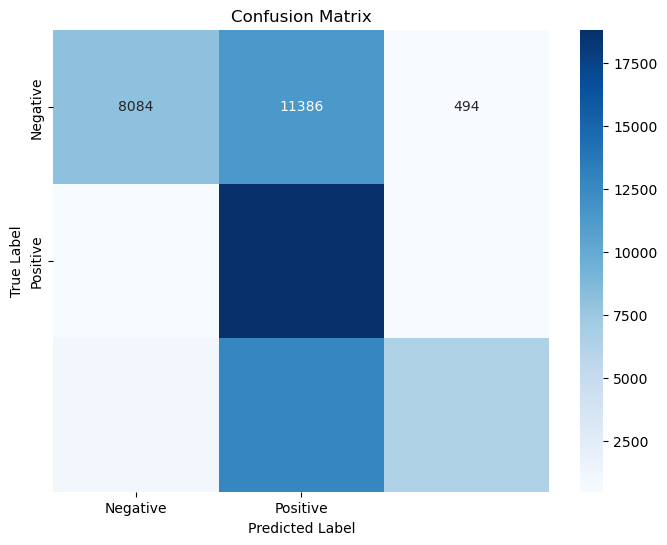

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_tfidf)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Evaluation of KNN Model

## Sample Tweet

- **"It's great to have stopped smoking finally! Wish I had tried vapes before. "**

## Preprocessed Tweet
- Lowercasing: "it's great to have stopped smoking finally! wish i had tried vapes before."
- Removing punctuation and special characters: "its great to have stopped smoking finally wish i had tried vapes before"
- Removing stopwords: "great have stopped smoking finally wish had tried vapes before"

## Convert to TF-IDF Features and Run KNN model
After preprocessing, we convert the tweet into numerical features using TF-IDF, which the KNN model can work with.

In [66]:

# Predict the sentiment of the tweet using the trained model on the previous sample_tweet_tfidf
predicted_label = knn.predict(sample_tweet_tfidf)

# Print the predicted sentiment
if predicted_label == 0:
    print("Sentiment: Negative")
elif predicted_label == 1:
    print("Sentiment: Neutral")
else:
    print("Sentiment: Positive")


Sentiment: Positive


## Result

Three models have been used for sentiment analysis and logistic regression model had the best results. To further improve evaluation, more models such as Decision trees, Random Forests and SVMs could be used. 
